# Get Population and Race Stats

In [96]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [97]:
state_fips = '36'
county_fips = {'061', '047', '005', '085', '081'}
fips = ['36061','36047','36005','36085','36081']

Load file cbg_b01.csv from the SafeGraph Census data. 

The file contains data about population size and statistics related to race. 




| Column Name  | Description     |
| --------- | ------------------------------------------------------------ |
| B01003e1  | TOTAL POPULATION: Total: Total population  -- (Estimate)     |
| B01003m1  | TOTAL POPULATION: Total: Total population -- (Margin of Error) |
| B02001e1  | RACE: Total: Total population -- (Estimate)                  |
| B02001e10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Estimate) |
| B02001e2  | RACE: White alone: Total population -- (Estimate)            |
| B02001e3  | RACE: Black or African American alone: Total population -- (Estimate) |
| B02001e4  | RACE: American Indian and Alaska Native alone: Total population --  (Estimate) |
| B02001e5  | RACE: Asian alone: Total population -- (Estimate)            |
| B02001e6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Estimate) |
| B02001e7  | RACE: Some other race alone: Total population -- (Estimate)  |
| B02001e8  | RACE: Two or more races: Total population -- (Estimate)      |
| B02001e9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Estimate) |
| B02001m1  | RACE: Total: Total population -- (Margin of Error)           |
| B02001m10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Margin of Error) |
| B02001m2  | RACE: White alone: Total population -- (Margin of Error)     |
| B02001m3  | RACE: Black or African American alone: Total population -- (Margin of  Error) |
| B02001m4  | RACE: American Indian and Alaska Native alone: Total population --  (Margin of Error) |
| B02001m5  | RACE: Asian alone: Total population -- (Margin of Error)     |
| B02001m6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Margin of Error) |
| B02001m7  | RACE: Some other race alone: Total population -- (Margin of Error) |
| B02001m8  | RACE: Two or more races: Total population -- (Margin of Error) |
| B02001m9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Margin of Error) |
| B02008e1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Estimate) |
| B02008m1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Margin of Error) |
| B02009e1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Estimate) |
| B02009m1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Margin of Error) |
| B02010e1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Estimate) |
| B02010m1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Margin of Error) |
| B02011e1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Estimate) |
| B02011m1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Margin of Error) |
| B02012e1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Estimate) |
| B02012m1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Margin of Error) |
| B02013e1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Estimate) |
| B02013m1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Margin of Error) |
| B03002e1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Estimate) |
| B03002e10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Estimate) |
| B03002e11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Estimate) |
| B03002e13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Estimate) |
| B03002e14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Estimate) |
| B03002e15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Estimate) |
| B03002e16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Estimate) |
| B03002e17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Estimate) |
| B03002e19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Estimate) |
| B03002e2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Estimate) |
| B03002e20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Estimate) |
| B03002e21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Estimate) |
| B03002e4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Estimate) |
| B03002e5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Estimate) |
| B03002e6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Estimate) |
| B03002e7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Estimate) |
| B03002e9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Estimate) |
| B03002m1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Margin of  Error) |
| B03002m10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Margin of  Error) |
| B03002m11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Margin of Error) |
| B03002m13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Margin of Error) |
| B03002m14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Margin of Error) |
| B03002m15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Margin of Error) |
| B03002m17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Margin of Error) |
| B03002m18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Margin of Error) |
| B03002m19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Margin of Error) |
| B03002m2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Margin of Error) |
| B03002m20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Margin of Error) |
| B03002m21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Margin of Error) |
| B03002m4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Margin of Error) |
| B03002m5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Margin of Error) |
| B03002m7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Margin of  Error) |
| B03002m8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Margin of Error) |
| B03002m9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Margin of Error) |
| B03003e1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Estimate) |
| B03003e2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Estimate) |
| B03003e3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Estimate) |
| B03003m1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Margin of Error) |
| B03003m2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Margin of Error) |
| B03003m3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Margin of Error) |

Load File with total population for our census block groups.

In [98]:
# Read file
df = pd.read_csv('data/census/safegraph_open_census_data/data/cbg_b01.csv', dtype={'census_block_group': object})
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,...,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
0,10010201001,745,226,356,121,33,32,46,39,4,...,33.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,745,226
1,10010201002,1265,232,639,139,3,6,6,9,53,...,45.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1265,232
2,10010202001,960,261,534,176,0,11,82,71,90,...,37.2,9.2,NaN,NaN,NaN,NaN,NaN,NaN,960,261
3,10010202002,1236,227,634,136,28,21,47,39,33,...,42.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,1236,227
4,10010203001,2364,378,1125,229,20,24,166,92,92,...,37.9,9.1,27.2,20.1,27.1,25.7,28.1,15.6,2364,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,460,171,43,65,0,13,0,...,NaN,NaN,57.5,33.1,58.8,10.1,37.3,29.6,921,332
220329,721537506012,2703,531,1353,352,142,112,62,63,62,...,NaN,NaN,34.2,7.7,25.4,12.6,38.6,7.6,2703,531
220330,721537506013,1195,425,583,222,0,13,67,75,103,...,NaN,NaN,25.9,4.0,22.4,6.6,40.5,22.8,1195,425
220331,721537506021,2005,471,926,251,68,49,54,40,107,...,NaN,NaN,46.3,8.1,39.4,15.2,50.3,7.7,2005,471


Extract all census block groups starting with 36061, 36047, 36005, 36085, and 36081.
36 is the New York state FIPs code. The final three digits are the county FIPS codes for New York County, Kings County, Bronx County, Richmond County, and Queens County respectively.  

In [99]:
# Function to filter out NY FIPS
def get_ny(df):
    return df[df['census_block_group'].astype(str).str[:5].isin(fips)]

In [100]:
# Filter out NY CBGs
df = get_ny(df)
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,...,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
127969,360050001000,0,11,0,11,0,11,0,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11
127970,360050001001,7503,365,6994,361,0,16,0,16,0,...,29.6,12.7,32.1,3.7,31.8,3.5,37.3,6.2,7503,365
127971,360050002000,0,11,0,11,0,11,0,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11
127972,360050002001,2114,488,923,241,0,11,28,35,94,...,NaN,NaN,34.2,10.1,33.8,11.2,37.4,19.5,2114,488
127973,360050002002,2168,607,1122,284,36,39,63,49,65,...,72.1,11.5,33.5,5.0,34.4,11.1,30.9,9.3,2168,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140118,360850319022,1293,395,603,205,49,56,54,45,31,...,48.9,19.6,43.8,9.5,NaN,NaN,43.8,9.5,1293,395
140119,360850319023,1311,414,589,183,39,47,0,11,72,...,35.9,16.9,26.8,9.7,31.7,3.8,13.4,8.4,1311,414
140120,360850323000,0,11,0,11,0,11,0,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11
140121,360850323001,1218,112,636,97,47,26,34,22,19,...,49.9,11.3,34.5,14.0,42.8,14.7,29.0,12.4,1218,112


In [19]:
'We have {} Census Block Groups'.format(len(df.index))

'We have 6493 Census Block Groups'

Extract the total population for each census block group, which is under column B01003e1.

In [20]:
# Select column
df = df[['census_block_group','B01003e1']]
df = df.rename(columns={'census_block_group':'cbg', 'B01003e1':'pop_total'})
df = df.set_index('cbg')
df = df
df

,pop_total
cbg,
360050001000,0
360050001001,7503
360050002000,0
360050002001,2114
360050002002,2168
...,...
360850319022,1293
360850319023,1311
360850323000,0


Load the file with the race stats

In [21]:
# Read file
df = pd.read_csv('data/census/safegraph_open_census_data/data/cbg_b02.csv', dtype={'census_block_group': object})
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,...,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
0,10010201001,745,226,585,198,160,140,0,11,0,...,0,11,0,11,0,11,0,11,0,11
1,10010201002,1265,232,1083,222,104,75,0,11,9,...,8,14,0,11,21,33,0,11,0,11
2,10010202001,960,261,361,179,568,195,0,11,0,...,18,30,0,11,0,11,0,11,0,11
3,10010202002,1236,227,615,154,571,168,0,11,24,...,0,11,0,11,0,11,0,11,0,11
4,10010203001,2364,378,1481,314,515,197,22,34,27,...,5,10,0,11,56,95,0,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,752,348,0,13,0,13,0,...,0,13,0,13,0,13,0,13,0,13
220329,721537506012,2703,531,2230,459,207,175,40,63,0,...,0,13,0,13,26,39,0,13,0,13
220330,721537506013,1195,425,1085,429,25,31,0,13,0,...,0,13,0,13,0,13,0,13,0,13
220331,721537506021,2005,471,1662,463,68,64,0,13,0,...,0,13,0,13,0,13,0,13,0,13


In [22]:
# Filter out NY CBGs
df = get_ny(df)
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,...,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
127969,360050001000,0,11,0,11,0,11,0,11,0,...,0,11,0,11,0,11,0,11,0,11
127970,360050001001,7503,365,933,187,4697,297,14,18,135,...,0,16,0,16,64,41,0,16,0,16
127971,360050002000,0,11,0,11,0,11,0,11,0,...,0,11,0,11,0,11,0,11,0,11
127972,360050002001,2114,488,758,364,688,471,0,11,53,...,0,11,0,11,0,11,0,11,0,11
127973,360050002002,2168,607,1042,502,476,241,0,11,0,...,6,11,0,11,0,11,15,23,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140118,360850319022,1293,395,370,167,862,380,0,11,13,...,0,11,0,11,0,11,0,11,16,24
140119,360850319023,1311,414,486,264,664,317,0,11,1,...,0,11,0,11,30,43,0,11,0,11
140120,360850323000,0,11,0,11,0,11,0,11,0,...,0,11,0,11,0,11,0,11,0,11
140121,360850323001,1218,112,495,137,547,116,1,9,0,...,0,11,0,11,7,12,0,11,0,11


In [23]:
# Get white only population
df = df[['census_block_group','B02001e1','B02001e2']]
df = df.rename(columns={'census_block_group':'cbg','B02001e1':'pop_total','B02001e2':'pop_whiteonly' })
df = df.set_index('cbg')
df

,pop_total,pop_whiteonly
cbg,,
360050001000,0,0
360050001001,7503,933
360050002000,0,0
360050002001,2114,758
360050002002,2168,1042
...,...,...
360850319022,1293,370
360850319023,1311,486
360850323000,0,0


In [25]:
# Calculate percentage
df['perc_whiteonly']= df.apply(lambda row: row['pop_whiteonly']/row['pop_total']*100 if row['pop_total']!=0 else 0, axis=1)
df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
360050001000,0,0,0.000000
360050001001,7503,933,12.435026
360050002000,0,0,0.000000
360050002001,2114,758,35.856197
360050002002,2168,1042,48.062731
...,...,...,...
360850319022,1293,370,28.615623
360850319023,1311,486,37.070938
360850323000,0,0,0.000000


In [27]:
# Get top 3 CBG with highest whiteonly percentage
df.nlargest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
360050093001,24,24,100.0
360050274022,734,734,100.0
360050323003,83,83,100.0


In [28]:
# Get top 3 CBG with lowest whiteonly percentage
df.nsmallest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
360050001000,0,0,0.0
360050002000,0,0,0.0
360050004000,0,0,0.0


In [29]:
# unique variable for join later
race_df = df 
race_df

# Get Poverty Stats


| Column Name | Description |
| -------- | ------------------------------------------------------------ |
| C17002e1 | RATIO OF INCOME TO POVERTY LEVEL IN THE  PAST 12 MONTHS: Total: Population for whom poverty status is determined --  (Estimate) |
| C17002e2 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: Under .50:  Population for whom poverty status is determined -- (Estimate) |
| C17002e3 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: .50 to .99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e4 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.00 to 1.24:  Population for whom poverty status is determined -- (Estimate) |
| C17002e5 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.25 to 1.49:  Population for whom poverty status is determined -- (Estimate) |
| C17002e6 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.50 to 1.84:  Population for whom poverty status is determined -- (Estimate) |
| C17002e7 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.85 to 1.99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e8 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 2.00 and over:  Population for whom poverty status is determined -- (Estimate) |






In [30]:
# Read file 
df = pd.read_csv('data/census/safegraph_open_census_data/data/cbg_c17.csv', dtype={'census_block_group': object})
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,...,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
0,10010201001,745,226,47,58,96,93,49,36,76,...,88,42,66,37,56,35,10,12,22,27
1,10010201002,1265,232,8,10,48,76,31,50,29,...,64,36,58,32,50,30,8,11,6,9
2,10010202001,955,259,122,155,243,118,20,19,16,...,72,38,62,33,62,33,0,11,10,14
3,10010202002,1059,214,53,47,65,68,61,50,87,...,145,51,138,50,132,51,6,9,7,10
4,10010203001,2364,378,23,32,77,75,74,86,117,...,268,99,249,90,213,88,36,35,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,462,279,160,119,85,107,35,...,74,58,74,58,74,58,0,13,0,13
220329,721537506012,2703,531,648,332,530,292,122,161,95,...,66,50,66,50,66,50,0,13,0,13
220330,721537506013,1195,425,15,26,277,254,48,76,90,...,19,21,19,21,19,21,0,13,0,13
220331,721537506021,1990,466,862,397,583,248,99,115,136,...,30,28,30,28,30,28,0,13,0,13


In [31]:
# Filter out new york CBGs
df = get_ny(df)
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,...,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
127969,360050001000,0,11,0,11,0,11,0,11,0,...,0,11,0,11,0,11,0,11,0,11
127970,360050001001,0,16,0,16,0,16,0,16,0,...,0,16,0,16,0,16,0,16,0,16
127971,360050002000,0,11,0,11,0,11,0,11,0,...,0,11,0,11,0,11,0,11,0,11
127972,360050002001,2114,488,285,186,56,82,249,170,10,...,26,39,26,39,26,39,0,11,0,11
127973,360050002002,2168,607,209,124,201,143,0,11,0,...,101,62,87,52,66,49,21,22,14,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140118,360850319022,1293,395,332,281,51,44,4,9,73,...,179,114,111,67,60,44,51,48,68,56
140119,360850319023,1311,414,354,300,238,202,100,103,0,...,8,11,7,11,7,11,0,11,1,2
140120,360850323000,0,11,0,11,0,11,0,11,0,...,0,11,0,11,0,11,0,11,0,11
140121,360850323001,1218,112,238,168,38,36,0,11,77,...,70,39,70,39,70,39,0,11,0,11


In [32]:
# Select columns
df = df[['census_block_group', 'C17002e1', 'C17002e2', 'C17002e3']]
df = df.rename(columns={'census_block_group':'cbg', 'C17002e1':'pov_pop_all'})
df = df.set_index('cbg')
df

,pov_pop_all,C17002e2,C17002e3
cbg,,,
360050001000,0,0,0
360050001001,0,0,0
360050002000,0,0,0
360050002001,2114,285,56
360050002002,2168,209,201
...,...,...,...
360850319022,1293,332,51
360850319023,1311,354,238
360850323000,0,0,0


In [34]:
# Add row values together
df['pop_poverty'] = df.apply(lambda row: row['C17002e2']+row['C17002e3'], axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty
cbg,,,,
360050001000,0,0,0,0
360050001001,0,0,0,0
360050002000,0,0,0,0
360050002001,2114,285,56,341
360050002002,2168,209,201,410
...,...,...,...,...
360850319022,1293,332,51,383
360850319023,1311,354,238,592
360850323000,0,0,0,0


In [35]:
# Calculate percentage
df['poverty_percentage'] = df.apply(lambda row: row['pop_poverty']/row['pov_pop_all']*100 if row['pov_pop_all'] != 0 else 0, axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty,poverty_percentage
cbg,,,,,
360050001000,0,0,0,0,0.000000
360050001001,0,0,0,0,0.000000
360050002000,0,0,0,0,0.000000
360050002001,2114,285,56,341,16.130558
360050002002,2168,209,201,410,18.911439
...,...,...,...,...,...
360850319022,1293,332,51,383,29.621036
360850319023,1311,354,238,592,45.156369
360850323000,0,0,0,0,0.000000


In [36]:
# Select Column
df = df[['poverty_percentage']]
df

,poverty_percentage
cbg,
360050001000,0.000000
360050001001,0.000000
360050002000,0.000000
360050002001,16.130558
360050002002,18.911439
...,...
360850319022,29.621036
360850319023,45.156369
360850323000,0.000000


In [37]:
# Preview largest
df.nlargest(3, 'poverty_percentage')

,poverty_percentage
cbg,
360470013002,94.600675
360610240001,89.676531
360810849004,87.337058


In [38]:
# Preview smallest
df.nsmallest(3, 'poverty_percentage')

,poverty_percentage
cbg,
360050001000,0.0
360050001001,0.0
360050002000,0.0


In [39]:
pov_df = df

In [55]:
# Read geojson for ALL US
# WARNING TAKES A LONG TIME
gdf = geopandas.read_file(
        '/Users/justinsnider/nyu-big-data/project/data/census/safegraph_open_census_data/geometry/cbg.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,01,081,041600,1,010810416001,AL,Lee County,H1,"MULTIPOLYGON (((-85.37282 32.63424, -85.37275 ..."
1,01,081,041600,2,010810416002,AL,Lee County,H1,"MULTIPOLYGON (((-85.38346 32.64838, -85.38301 ..."
2,01,081,041700,4,010810417004,AL,Lee County,H1,"MULTIPOLYGON (((-85.37139 32.60139, -85.37138 ..."
3,01,073,011107,4,010730111074,AL,Jefferson County,H1,"MULTIPOLYGON (((-86.64797 33.59205, -86.64771 ..."
4,01,073,011108,4,010730111084,AL,Jefferson County,H1,"MULTIPOLYGON (((-86.65206 33.59869, -86.65204 ..."
...,...,...,...,...,...,...,...,...,...
220328,72,085,190201,2,720851902012,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.86850 18.18426, -65.86836 ..."
220329,72,085,190201,3,720851902013,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.87053 18.17034, -65.87040 ..."
220330,72,085,190202,1,720851902021,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.87678 18.17519, -65.87656 ..."
220331,72,085,190202,2,720851902022,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.88054 18.15797, -65.87998 ..."


In [56]:
# Filter by state FIPS
gdf = gdf[gdf.apply(lambda r: True if r['StateFIPS']==state_fips else False, axis=1)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
127690,36,005,017500,2,360050175002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
127691,36,005,014100,1,360050141001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
127692,36,005,014500,1,360050145001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
127693,36,005,007500,2,360050075002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
127694,36,005,041800,1,360050418001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...,...
143148,36,011,040500,2,360110405002,NY,Cayuga County,H1,"MULTIPOLYGON (((-76.66790 43.00730, -76.66747 ..."
143149,36,011,040500,3,360110405003,NY,Cayuga County,H1,"MULTIPOLYGON (((-76.61199 43.00957, -76.60329 ..."
143150,36,011,040700,1,360110407001,NY,Cayuga County,H1,"MULTIPOLYGON (((-76.55245 42.92640, -76.55029 ..."
143151,36,011,040800,3,360110408003,NY,Cayuga County,H1,"MULTIPOLYGON (((-76.43020 42.77944, -76.42203 ..."


In [57]:
# Filter by county FIPS
gdf = gdf[gdf.apply(lambda r: True if r['CountyFIPS'] in county_fips else False, axis=1)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
127690,36,005,017500,2,360050175002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
127691,36,005,014100,1,360050141001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
127692,36,005,014500,1,360050145001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
127693,36,005,007500,2,360050075002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
127694,36,005,041800,1,360050418001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...,...
143120,36,085,004000,3,360850040003,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ..."
143121,36,085,004000,5,360850040005,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ..."
143122,36,085,007000,0,360850070000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ..."
143123,36,085,007400,0,360850074000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ..."


In [ ]:
# Write filtered geojson file to disc
gdf.to_file('/Users/justinsnider/nyu-big-data/project/clean-data/ny/ny.geojson', driver='GeoJSON')

In [70]:
# Read geojson file
gdf = geopandas.read_file(
        '/Users/justinsnider/nyu-big-data/project/clean-data/ny/ny.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,36,005,017500,2,360050175002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
1,36,005,014100,1,360050141001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
2,36,005,014500,1,360050145001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
3,36,005,007500,2,360050075002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
4,36,005,041800,1,360050418001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...,...
6488,36,085,004000,3,360850040003,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ..."
6489,36,085,004000,5,360850040005,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ..."
6490,36,085,007000,0,360850070000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ..."
6491,36,085,007400,0,360850074000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ..."


<AxesSubplot:>

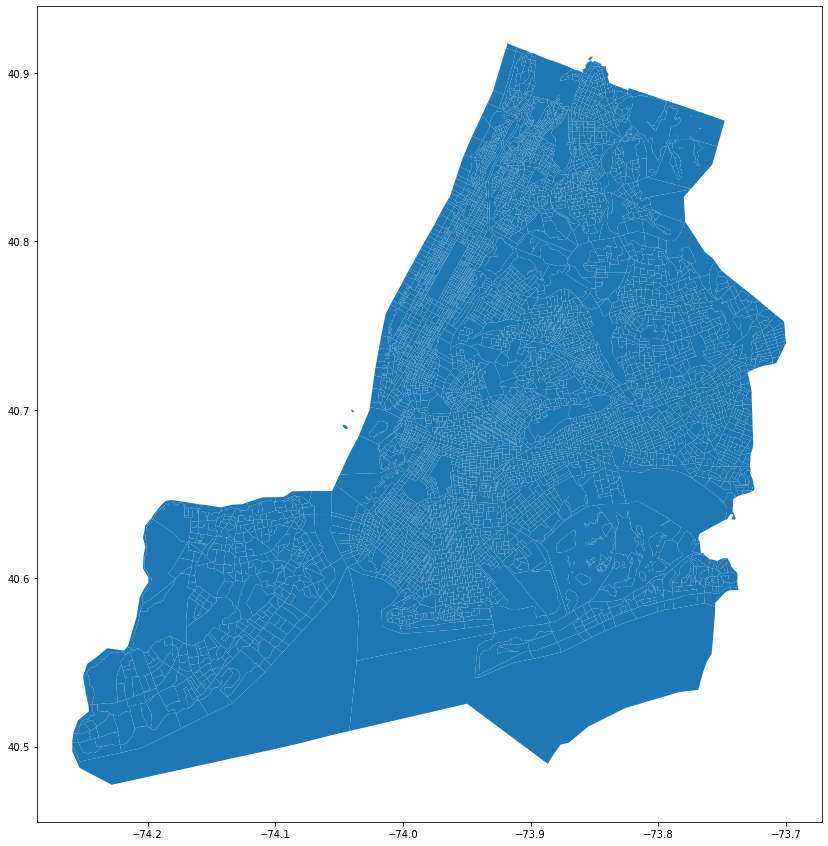

In [80]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
gdf.plot(ax=ax)

In [72]:
# simplify column name
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,cbg,State,County,ClassCode,geometry
0,36,005,017500,2,360050175002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
1,36,005,014100,1,360050141001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
2,36,005,014500,1,360050145001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
3,36,005,007500,2,360050075002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
4,36,005,041800,1,360050418001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...,...
6488,36,085,004000,3,360850040003,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ..."
6489,36,085,004000,5,360850040005,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ..."
6490,36,085,007000,0,360850070000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ..."
6491,36,085,007400,0,360850074000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ..."


In [73]:
# Verify column datatype
gdf['cbg'].dtype

dtype('O')

In [74]:
# # Change column datatype
# gdf = gdf.astype({'cbg':'int64'})
# gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,cbg,State,County,ClassCode,geometry
0,36,005,017500,2,360050175002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
1,36,005,014100,1,360050141001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
2,36,005,014500,1,360050145001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
3,36,005,007500,2,360050075002,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
4,36,005,041800,1,360050418001,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...,...
6488,36,085,004000,3,360850040003,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ..."
6489,36,085,004000,5,360850040005,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ..."
6490,36,085,007000,0,360850070000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ..."
6491,36,085,007400,0,360850074000,NY,Richmond County,H6,"MULTIPOLYGON (((-74.06180 40.59235, -74.05969 ..."


In [75]:
# Verify datatype of column
gdf['cbg'].dtype

dtype('int64')

In [76]:
# set index for join
gdf = gdf.set_index('cbg')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry
cbg,,,,,,,,
360050175002,36,005,017500,2,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
360050141001,36,005,014100,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
360050145001,36,005,014500,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
360050075002,36,005,007500,2,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
360050418001,36,005,041800,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ..."
...,...,...,...,...,...,...,...,...
360850040003,36,085,004000,3,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ..."
360850040005,36,085,004000,5,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ..."
360850070000,36,085,007000,0,NY,Richmond County,H6,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ..."


In [79]:
gdf = gdf.merge(race_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,,,,,,,,,
360050175002,36,005,017500,2,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...",1110,164,14.774775
360050141001,36,005,014100,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...",1445,277,19.169550
360050145001,36,005,014500,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...",2003,171,8.537194
360050075002,36,005,007500,2,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...",2731,124,4.540461
360050418001,36,005,041800,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ...",936,85,9.081197
...,...,...,...,...,...,...,...,...,...,...,...
360850040003,36,085,004000,3,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ...",2757,414,15.016322
360850040005,36,085,004000,5,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ...",948,431,45.464135
360850070000,36,085,007000,0,NY,Richmond County,H6,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ...",0,0,0.000000


In [85]:
gdf = gdf.merge(pov_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly,poverty_percentage
cbg,,,,,,,,,,,,
360050175002,36,005,017500,2,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...",1110,164,14.774775,55.225225
360050141001,36,005,014100,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...",1445,277,19.169550,36.747405
360050145001,36,005,014500,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...",2003,171,8.537194,39.476678
360050075002,36,005,007500,2,NY,Bronx County,H6,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...",2731,124,4.540461,22.812157
360050418001,36,005,041800,1,NY,Bronx County,H6,"MULTIPOLYGON (((-73.86287 40.89515, -73.86146 ...",936,85,9.081197,18.859649
...,...,...,...,...,...,...,...,...,...,...,...,...
360850040003,36,085,004000,3,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08465 40.61520, -74.08405 ...",2757,414,15.016322,40.007254
360850040005,36,085,004000,5,NY,Richmond County,H6,"MULTIPOLYGON (((-74.08103 40.61328, -74.08056 ...",948,431,45.464135,0.000000
360850070000,36,085,007000,0,NY,Richmond County,H6,"MULTIPOLYGON (((-74.07382 40.58045, -74.06953 ...",0,0,0.000000,0.000000


In [95]:
# Write filtered geojson file to disc
gdf.to_file('/Users/justinsnider/nyu-big-data/project/clean-data/ny/ny_census.geojson', driver='GeoJSON')

<AxesSubplot:>

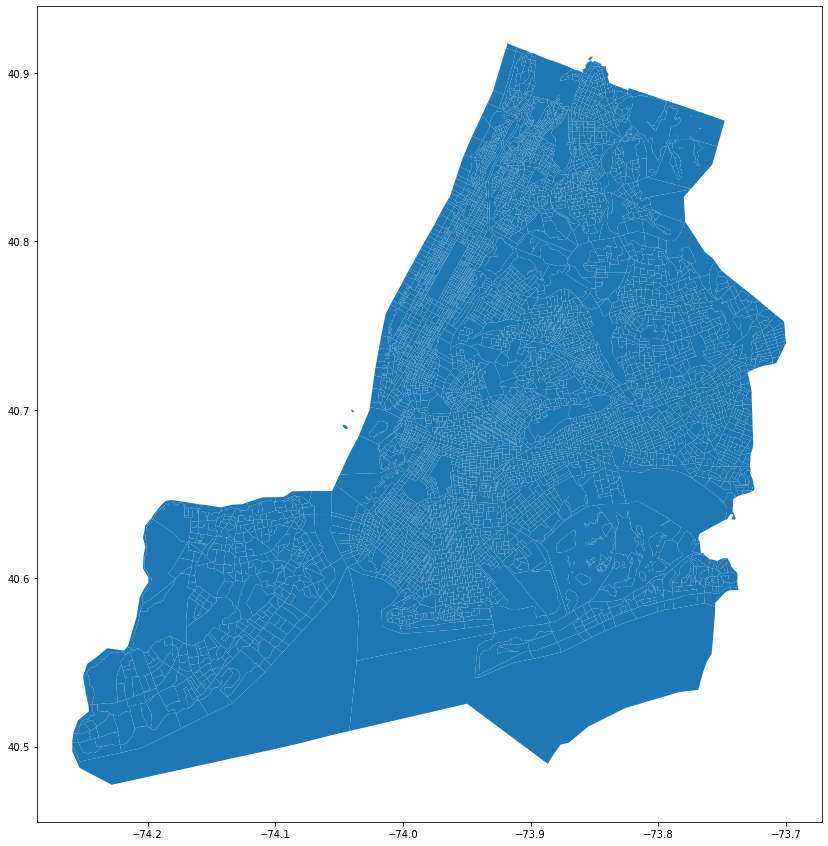

In [86]:
fig, ax = plt.subplots(figsize = (15,15))
gdf.plot(ax=ax)

<AxesSubplot:>

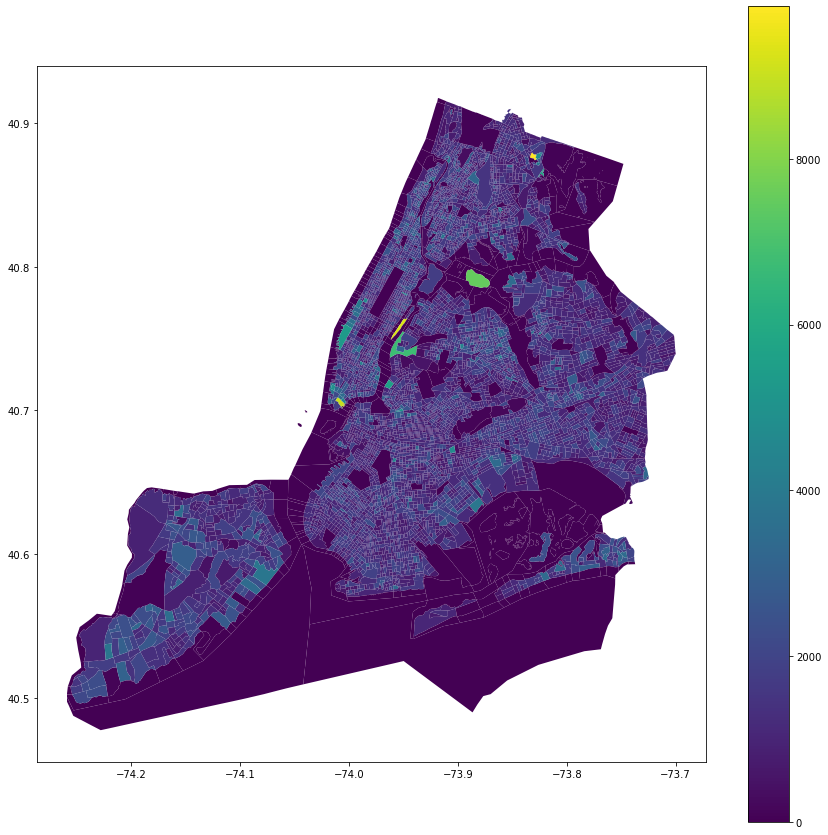

In [87]:
# Plot population size
fig, ax = plt.subplots(figsize = (15,15))
gdf.plot(column='pop_total', ax=ax, legend=True)

<AxesSubplot:>

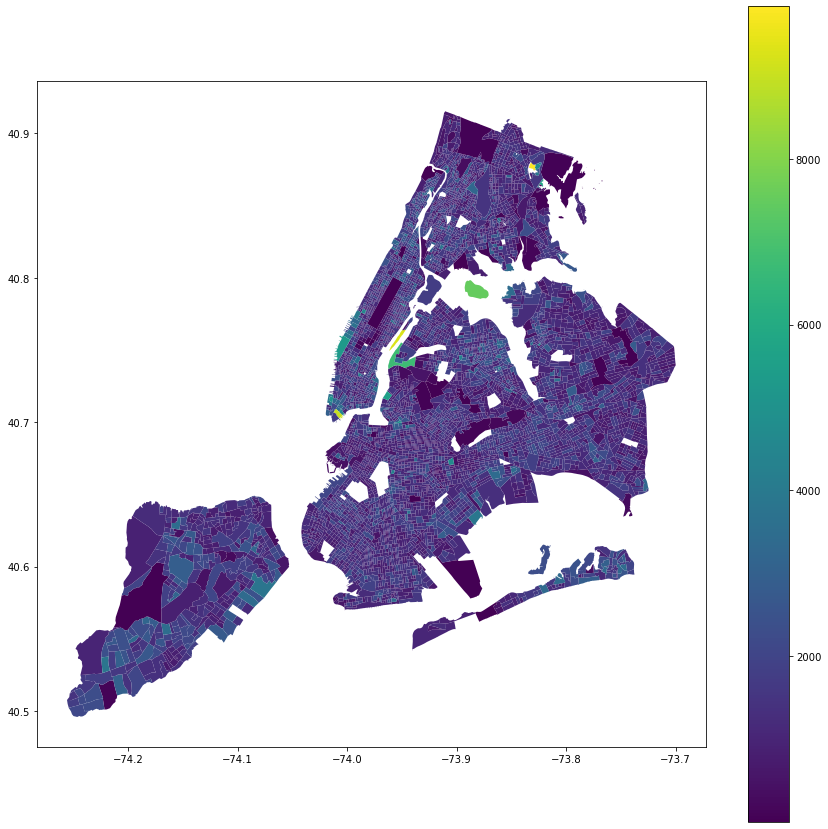

In [88]:
# Pop where not 0
fig, ax = plt.subplots(figsize = (15,15))
gdf[gdf['pop_total']!=0].plot(column='pop_total', ax=ax, legend=True)

<AxesSubplot:>

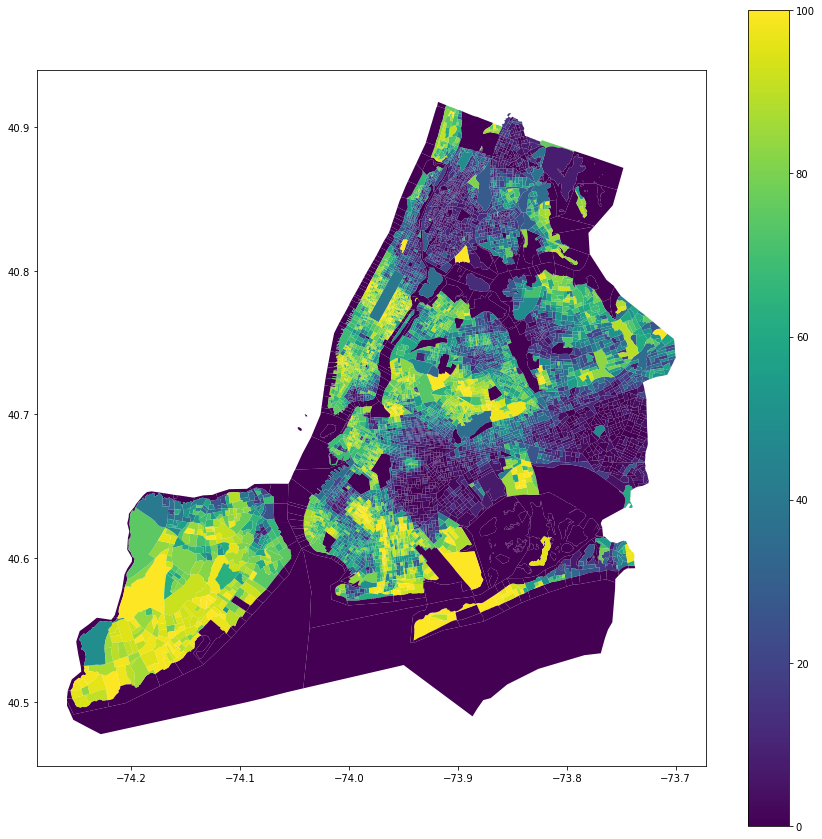

In [93]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
gdf.plot(column='perc_whiteonly', ax=ax, legend=True)

<AxesSubplot:>

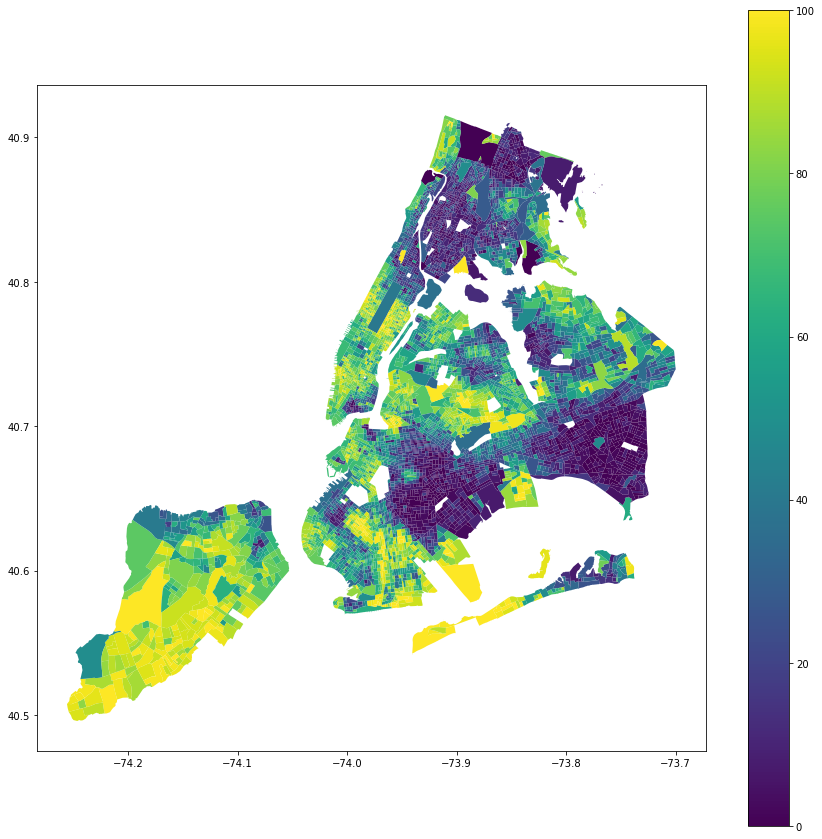

In [90]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
gdf[gdf['pop_total']!=0].plot(column='perc_whiteonly', ax=ax, legend=True)

<AxesSubplot:>

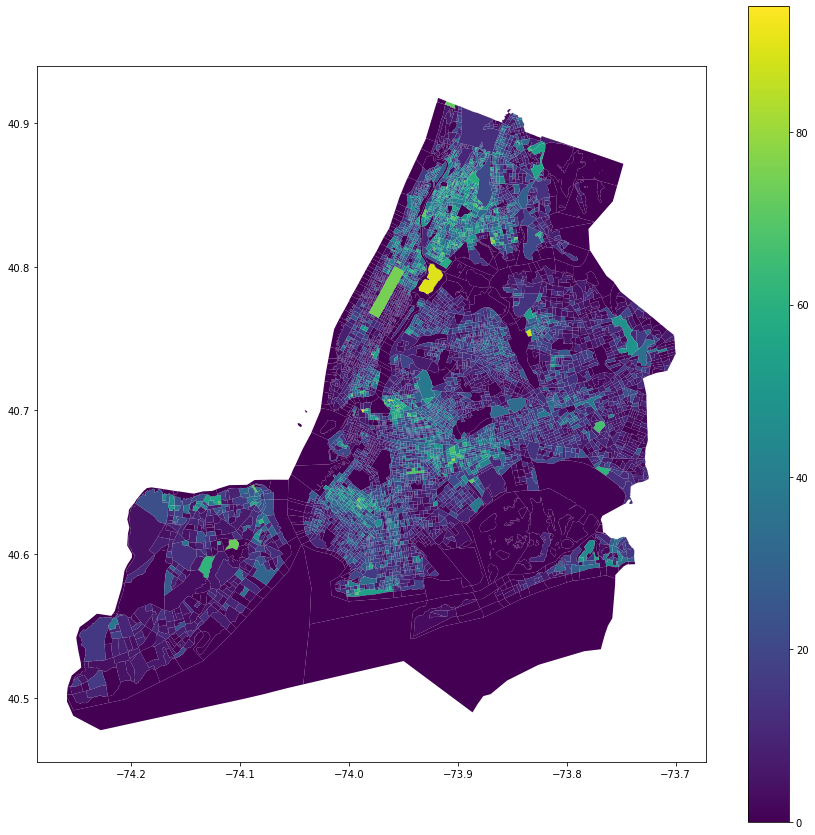

In [92]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
gdf.plot(column='poverty_percentage', ax=ax, legend=True)

<AxesSubplot:>

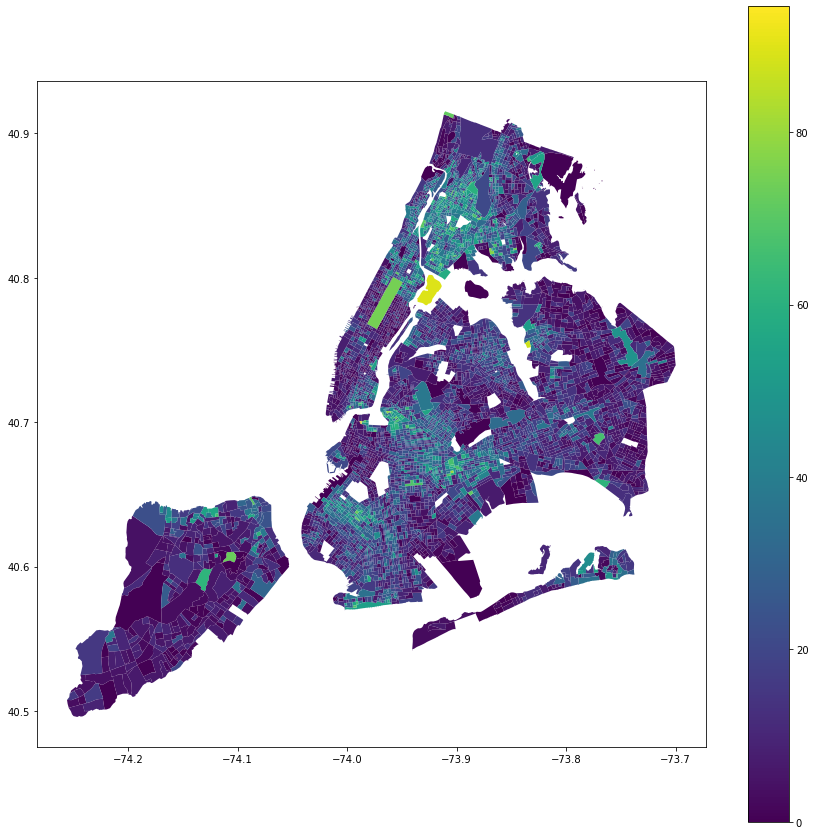

In [91]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
gdf[gdf['pop_total']!=0].plot(column='poverty_percentage', ax=ax, legend=True)

In [94]:
# Extract stats to save
stats_df = gdf[['pop_total','poverty_percentage','perc_whiteonly']]
stats_df

,pop_total,poverty_percentage,perc_whiteonly
cbg,,,
360050175002,1110,55.225225,14.774775
360050141001,1445,36.747405,19.169550
360050145001,2003,39.476678,8.537194
360050075002,2731,22.812157,4.540461
360050418001,936,18.859649,9.081197
...,...,...,...
360850040003,2757,40.007254,15.016322
360850040005,948,0.000000,45.464135
360850070000,0,0.000000,0.000000


In [68]:
# Write stats to disc
filename = '/Users/justinsnider/nyu-big-data/project/clean-data/ny/ny.csv'
stats_df.to_csv(filename)